In [25]:
from typing import List, Literal, Optional
import requests
import pandas as pd
from pydantic import BaseModel
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
def get_player_elo_evolution(player_id: int) -> pd.DataFrame:
    URL = f"https://ratings.fide.com/profile/{player_id}/chart"
    page = requests.get(URL)

    soup = BeautifulSoup(page.text, 'html.parser')
    table = soup.find_all("table", {"class": "profile-table_chart-table"})

    df = pd.read_html(str(table), header=0)[0]
    df.columns = [
        "date", "rating", "games", "rapid_rating", 
        "rapid_games", "blitz_rating", "blitz_games"
    ]
    
    return df


In [5]:
df_mihai = get_player_elo_evolution(13903748)
mihai_series = df_mihai.set_index('date')["rating"].sort_index(ascending=True)

In [7]:
df_peer = get_player_elo_evolution(13900609)
peer_series = df_peer.set_index('date')["rating"].sort_index(ascending=True)

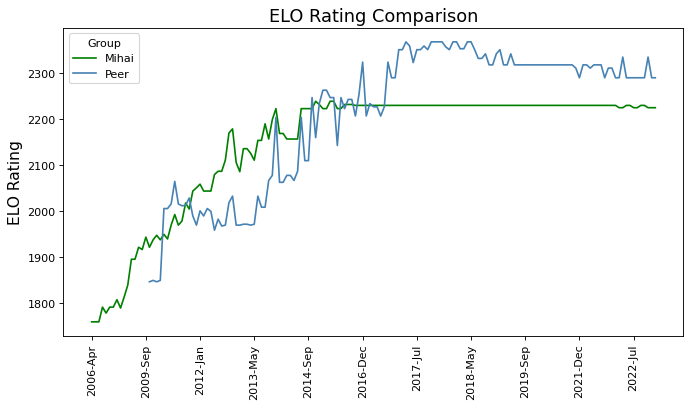

In [28]:
#plot individual lines with custom colors and labels
figure(figsize=(10, 5), dpi=80)

plt.plot(mihai_series, label='Mihai', color='green')
plt.plot(peer_series, label='Peer', color='steelblue')

#add legend
plt.legend(title='Group')

#add axes labels and a title
plt.ylabel('ELO Rating', fontsize=14)
plt.title('ELO Rating Comparison', fontsize=16)
plt.xticks(mihai_series.index[::15],  rotation='vertical')

#display plot
plt.show()